In [1]:
!pip install mpl_finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#import library
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(20,8)
import pandas as pd
import numpy  as np
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import statsmodels.api as sm

In [5]:
time_series_df=pd.read_csv('/content/dc.csv',
                           sep=',',
                           index_col=0,
                           parse_dates=[0])

In [6]:
time_series_df.head()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


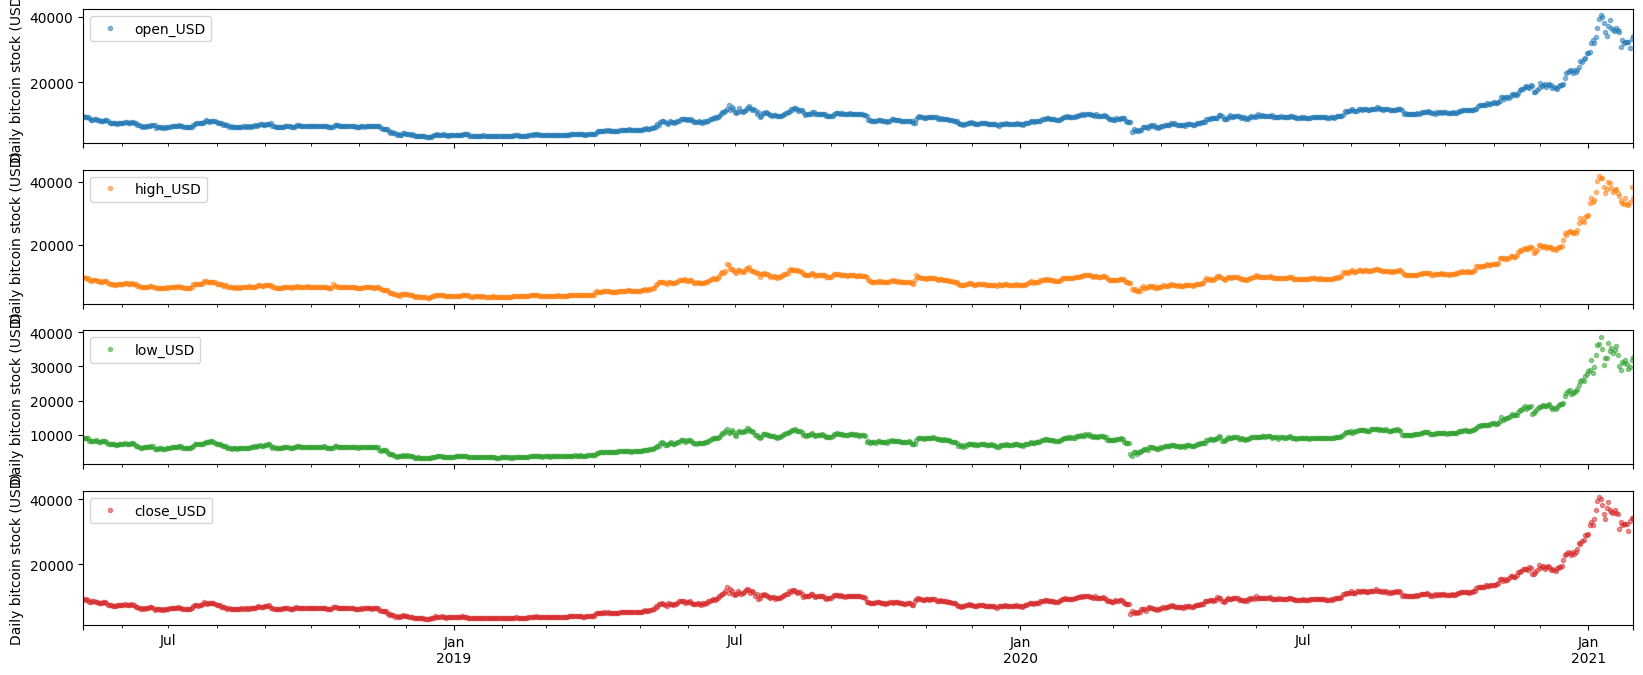

In [7]:
#ploting
cols_plot=['open_USD','high_USD','low_USD','close_USD']
axes = time_series_df[cols_plot].plot(marker='.',alpha=0.5,linestyle='None',subplots=True)
for ax in axes:
  ax.set_ylabel('Daily bitcoin stock (USD)')

Text(0, 0.5, 'Daily bitcoin stock (USD)')

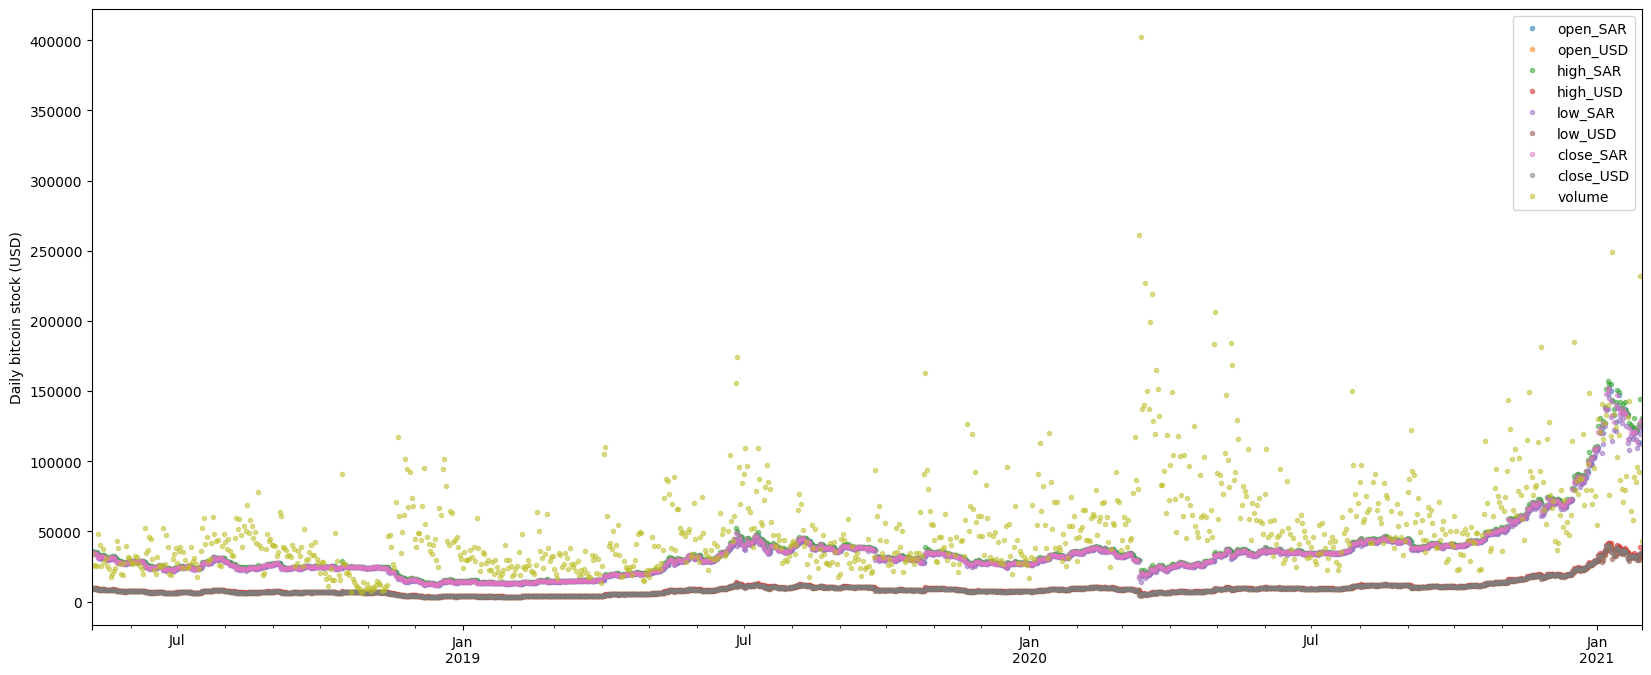

In [8]:
axes=time_series_df.plot(marker='.', alpha=0.5, linestyle='None')
plt.ylabel('Daily bitcoin stock (USD)')

In [9]:
open_USD=time_series_df['open_USD'].to_numpy()
high_USD=time_series_df['high_USD'].to_numpy()
low_USD=time_series_df['low_USD'].to_numpy()
close_USD=time_series_df['close_USD'].to_numpy()


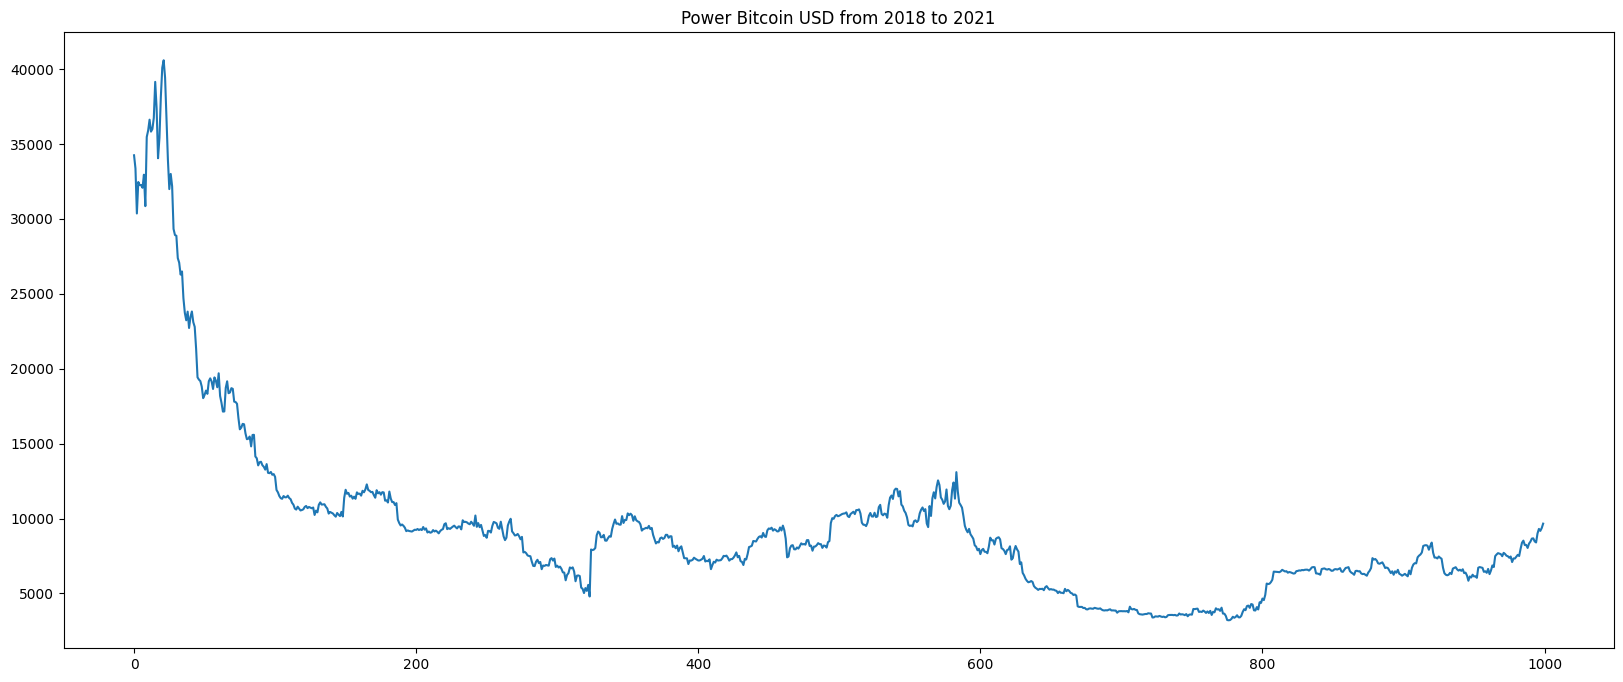

In [10]:
plt.title('Power Bitcoin USD from 2018 to 2021')
plt.plot(open_USD)

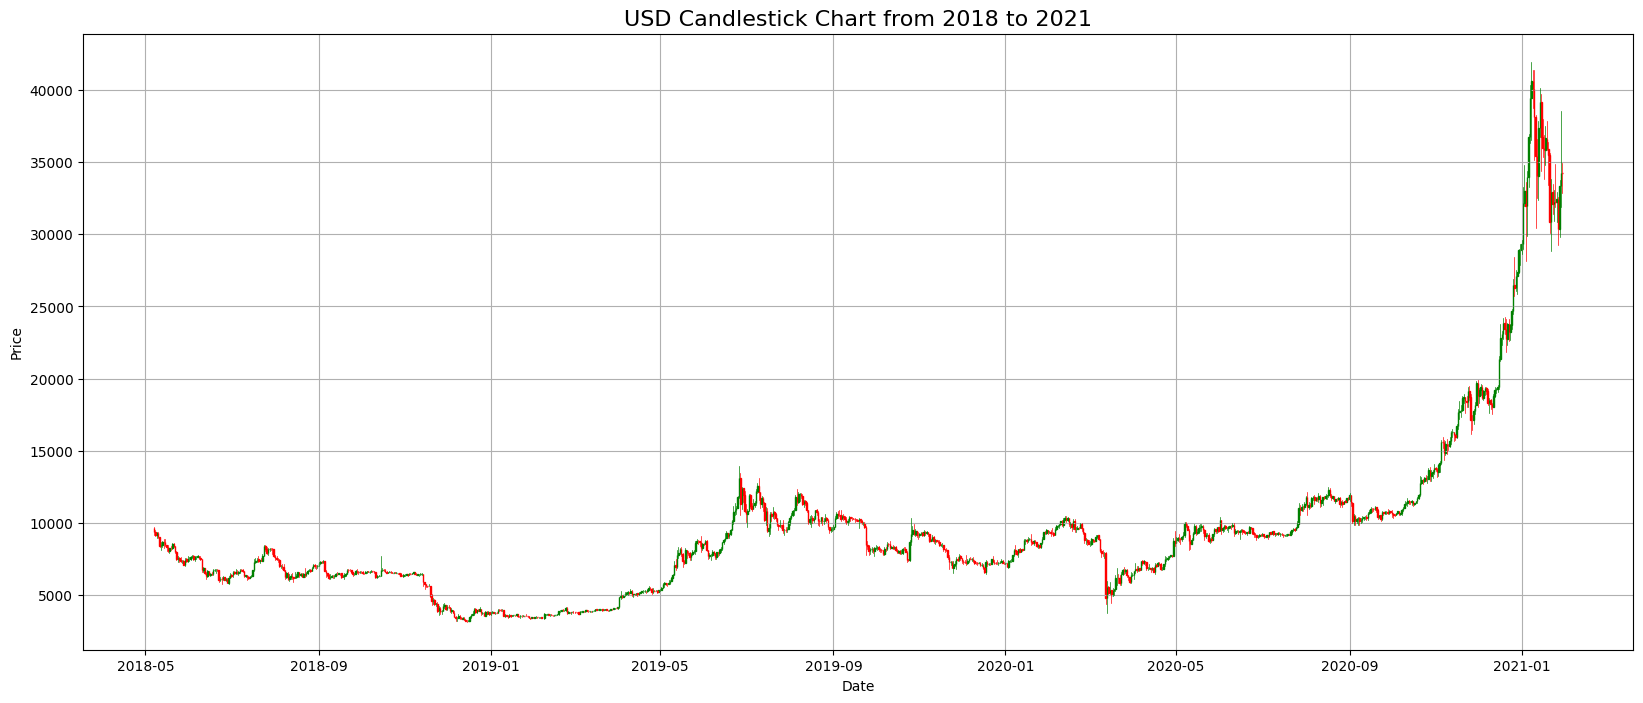

In [11]:
ohlc = []
for i in range(len(time_series_df)):
    ohlc.append((mdates.date2num(time_series_df.index[i]), open_USD[i], high_USD[i], low_USD[i], close_USD[i]))


fig, ax = plt.subplots()
candlestick_ohlc(ax, ohlc, width=0.4, colorup='green', colordown='red')
ax.xaxis_date()


plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.title('USD Candlestick Chart from 2018 to 2021',size=16)


plt.show()


<ipython-input-12-3eb5192d06f9>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  decomposition = sm.tsa.seasonal_decompose(time_series_df['2019']['open_USD'],model='additive')


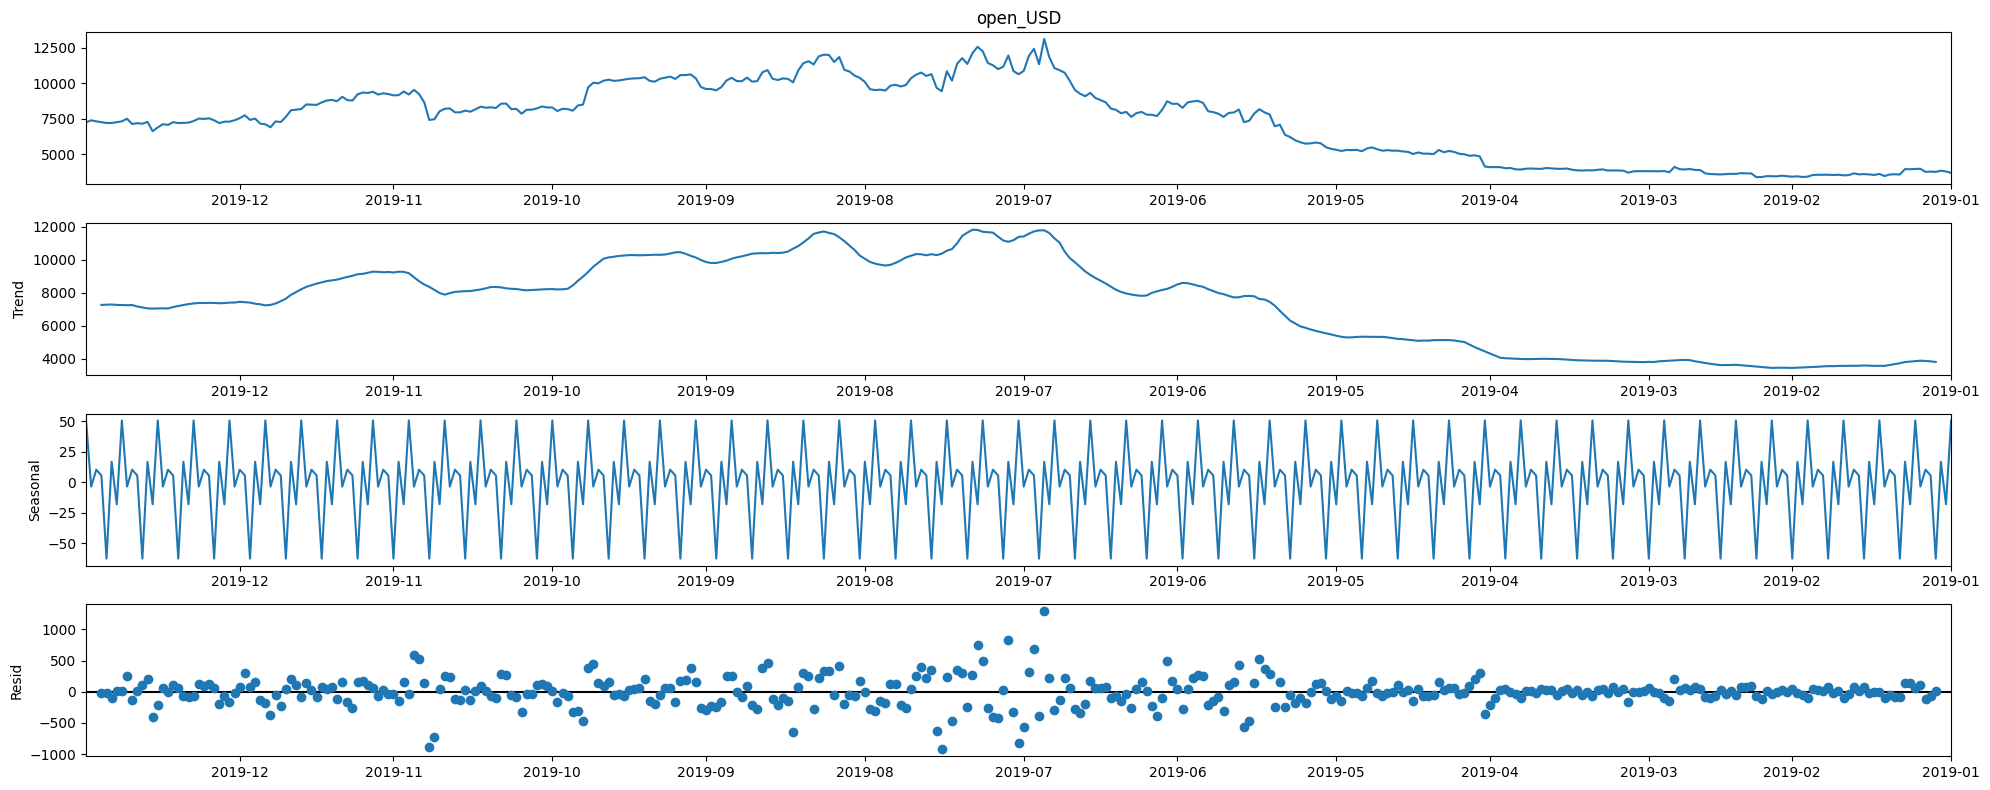

In [12]:
#statistical methods
decomposition = sm.tsa.seasonal_decompose(time_series_df['2019']['open_USD'],model='additive')
decomposition.plot();

In [13]:
#split a univariate sequence into samples
def split_seq(sequence,n_steps_in,n_steps_out):
   X,y=list(),list()
   for i in range(len(sequence)):
     end_ix= i + n_steps_in
     out_end_ix= end_ix + n_steps_out
     if out_end_ix > len(sequence):
       break
     seq_x,seq_y=sequence[i:end_ix],sequence[end_ix:out_end_ix]
     X.append(seq_x)
     y.append(seq_y)
   return np.array(X),np.array(y)


In [14]:
n_steps_in=30
n_steps_out=1

In [15]:
X, Y = split_seq(open_USD, n_steps_in, n_steps_out)
X.shape, Y.shape

((970, 30), (970, 1))

In [16]:
X[0], Y[0]

(array([34246.28, 33368.18, 30362.19, 32464.01, 32254.19, 32259.45,
        32078.  , 32950.  , 30851.99, 35468.23, 35901.94, 36622.46,
        35824.99, 35994.98, 36737.43, 39145.21, 37371.38, 34049.15,
        35410.37, 38150.02, 40088.22, 40586.96, 39432.48, 36769.36,
        33949.53, 31989.75, 33000.05, 32176.45, 29331.7 , 28923.63]),
 array([28875.55]))

In [17]:
# reshape from [samples, timesteps] to [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(970, 30, 1)

In [18]:
X_train = X[:-365]
Y_train = Y[:-365]

X_test = X[-365:]
Y_test = Y[-365:]

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((605, 30, 1), (605, 1), (365, 30, 1), (365, 1))

In [19]:
#Rolling mean baseline
def rolling_mean_baseline(history):
  return np.mean(history, axis=1)

In [20]:
Y_pred_baseline_rolling=rolling_mean_baseline(X)
Y_pred_baseline_rolling.shape

(970, 1)

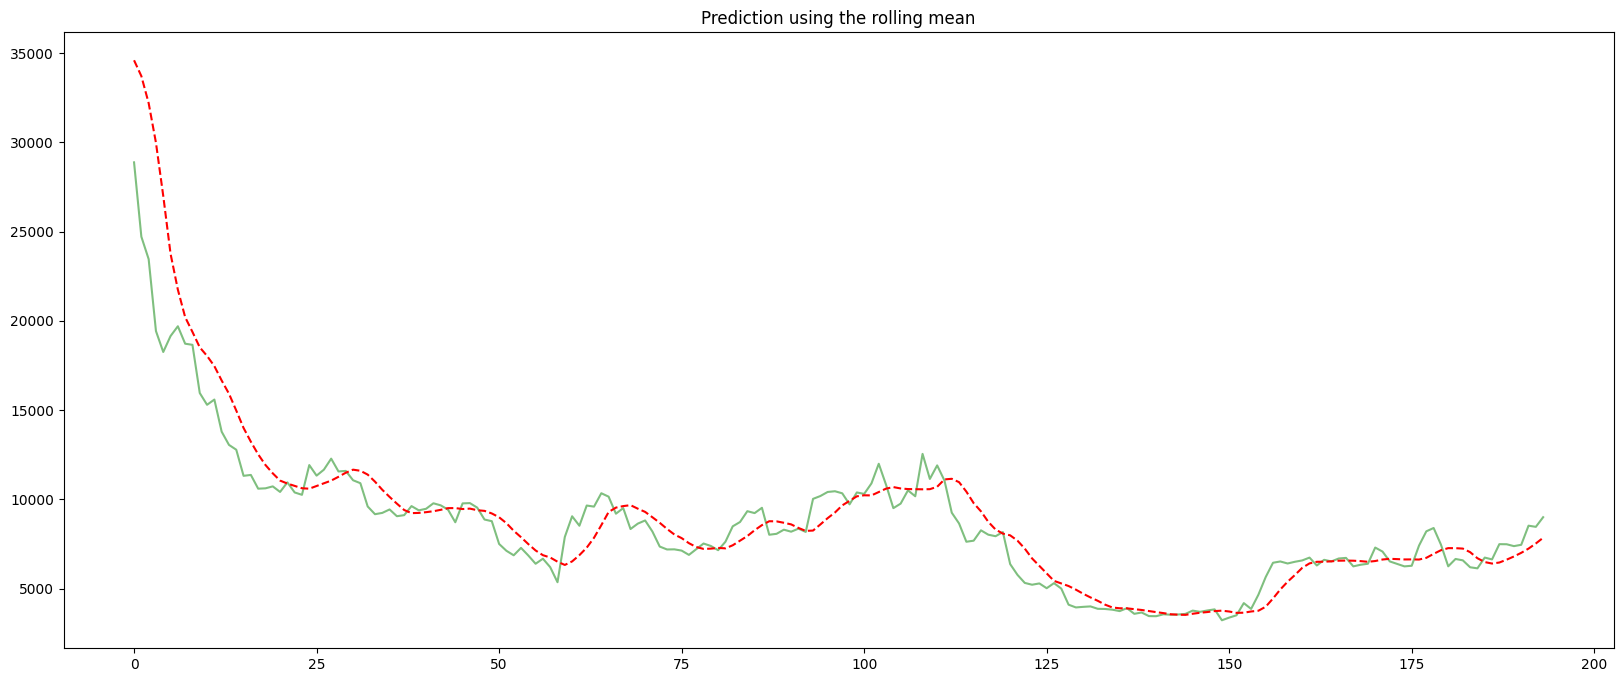

In [21]:
# this gets really crowded, using a stride, makes it more readable
stride = 5


plt.plot(open_USD[n_steps_in::stride], alpha=0.5, color='g')
plt.plot(Y_pred_baseline_rolling[::stride], color='r', ls='dashed')

plt.title('Prediction using the rolling mean');

In [31]:
from sklearn.metrics import r2_score

score = r2_score(Y, Y_pred_baseline_rolling)
score_percent = score * 100
print(f'accuracy R2 score : {score_percent:.2f}%')


accuracy R2 score : 78.04%


In [23]:
# Baseline : Previous Value
def pervious_value_baseline(history):
  return history[:,-1]

In [24]:
y_pred_baseline_prev_value=pervious_value_baseline(X)
y_pred_baseline_prev_value.shape

(970, 1)

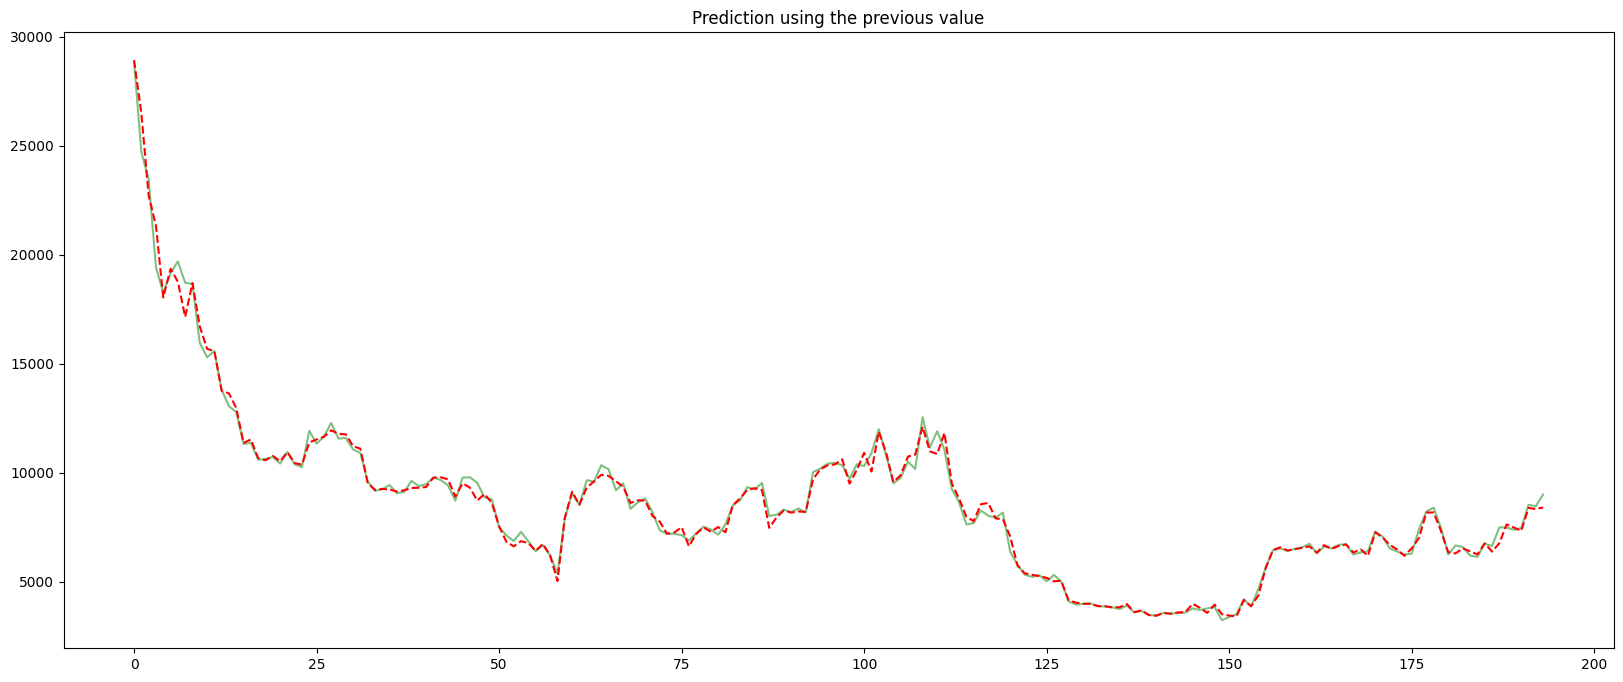

In [27]:
#setting stride =5
stride = 5
plt.plot(open_USD[n_steps_in::stride],alpha=0.5,color='g')
plt.plot(y_pred_baseline_prev_value[::stride],color='r',ls='dashed')
plt.title('Prediction using the previous value');

**This looks good at first sight, but wait for the R2 score**

It is (obviously) always off by one

In [30]:
score1 = r2_score(Y, y_pred_baseline_prev_value)
score_percent1 = score1 * 100
print(f'accuracy R2 score : {score_percent1:.2f}%')

accuracy R2 score : 99.16%


the r2 score has shown good results at a percentage of 99.18%, indicating that the prediction is correct

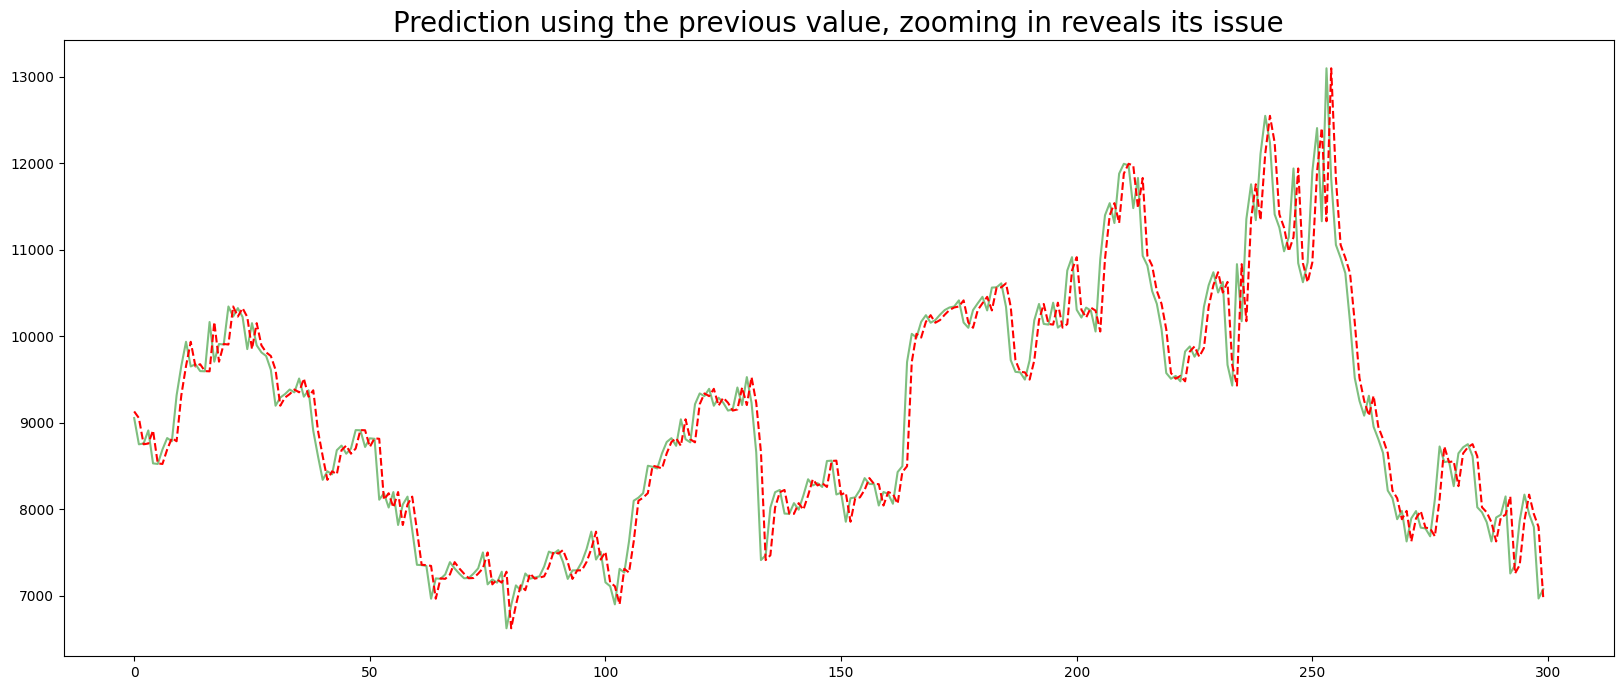

In [38]:
#setting stride =1
stride=1
#too crwoded,zoom in
win_start=300
win_end=600
plt.plot(open_USD[n_steps_in+win_start
                  :n_steps_in+win_end:stride],alpha=0.5,color='g')
plt.plot(y_pred_baseline_prev_value[win_start:win_end:stride],color='r',ls='dashed')
#show plot
plt.title('Prediction using the previous value, zooming in reveals its issue',size=20);

**Prediction using RNNs and TensorFlow**

will RNN be better than R2 score?? We will see later .

In [39]:
#import library tensorflow 
import tensorflow as tf
print(tf.__version__)

2.12.0


In [56]:
def r2_metric(y_true,y_pred):
  total_err=tf.reduce_sum(tf.square(tf.subtract(y_true,tf.reduce_mean(y_true))))
  unexplained_err=tf.reduce_sum(tf.square(tf.subtract(y_true,y_pred)))
  R_squared=tf.subtract(1.0,tf.divide(unexplained_err,total_err))

  return R_squared


In [80]:
, metrics
from keras.api._v2.keras import optimizers
# impor library using training model RNN
from tensorflow import keras
from tensorflow.keras.layers import Dense,LSTM,GRU,SimpleRNN,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential,Model

model=Sequential()

model.add(SimpleRNN(256,activation='relu',input_shape=(n_steps_in,n_features)))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam',loss='mse',metrics=[r2_metric])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 256)               66048     
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 66,305
Trainable params: 66,305
Non-trainable params: 0
_________________________________________________________________


In [81]:
# setting hyperparameters
batch_size=32
epochs=25
#training model RNNs
history=model.fit(X_train,Y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(X_test,Y_test),
                  verbose=1)

Epoch 1/25
19/19 [==============================] - 3s 78ms/step - loss: 11399254.0000 - r2_metric: -0.2936 - val_loss: 330731.5000 - val_r2_metric: -4.1036
Epoch 2/25
19/19 [==============================] - 1s 66ms/step - loss: 792251.0000 - r2_metric: 0.9004 - val_loss: 67729.6797 - val_r2_metric: 0.1977
Epoch 3/25
19/19 [==============================] - 1s 41ms/step - loss: 356014.3750 - r2_metric: 0.9670 - val_loss: 91340.2578 - val_r2_metric: 0.0454
Epoch 4/25
19/19 [==============================] - 1s 38ms/step - loss: 284727.3750 - r2_metric: 0.9709 - val_loss: 88336.3906 - val_r2_metric: 0.0868
Epoch 5/25
19/19 [==============================] - 1s 38ms/step - loss: 267337.1875 - r2_metric: 0.9689 - val_loss: 51897.0508 - val_r2_metric: 0.5147
Epoch 6/25
19/19 [==============================] - 1s 40ms/step - loss: 252268.3281 - r2_metric: 0.9746 - val_loss: 79008.5859 - val_r2_metric: 0.2042
Epoch 7/25
19/19 [==============================] - 1s 38ms/step - loss: 255592.250

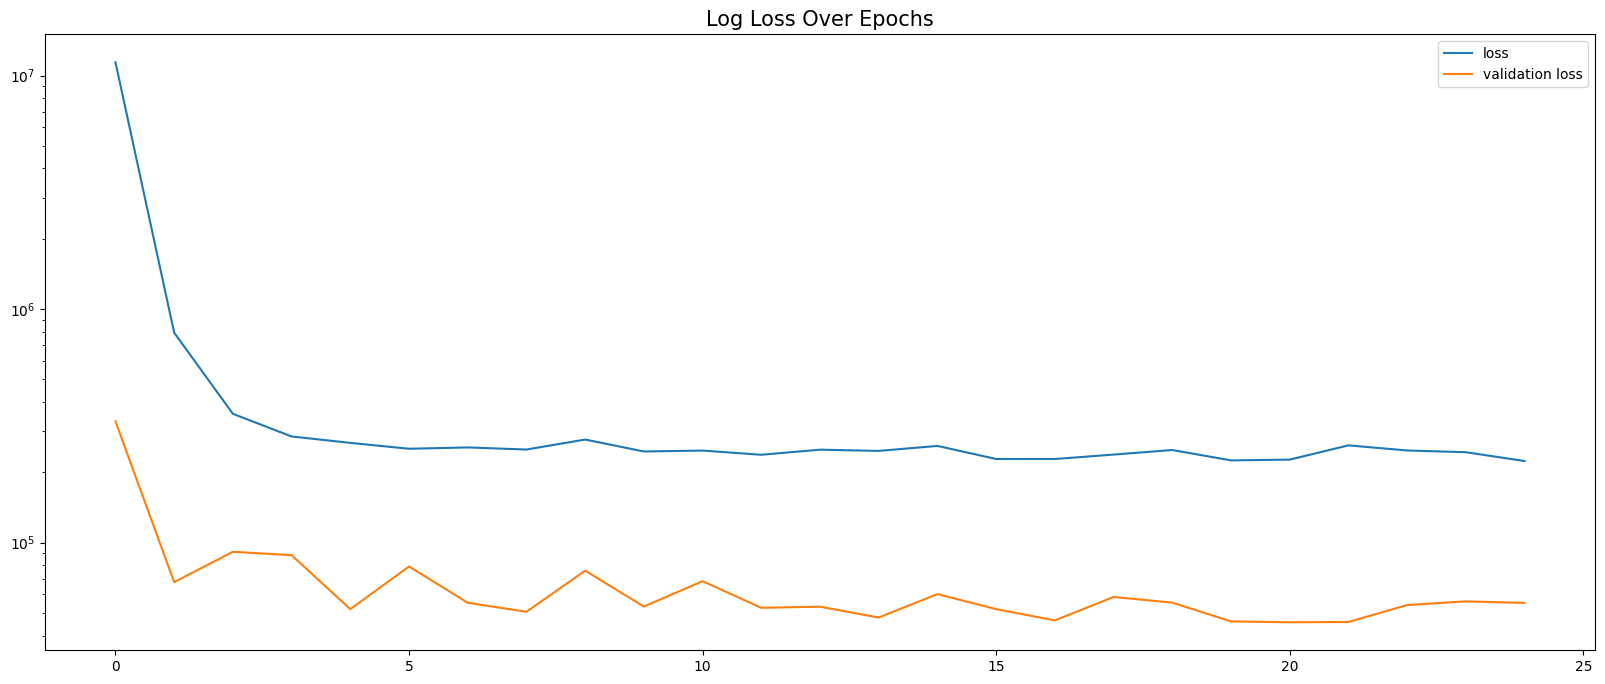

In [82]:
plt.yscale('log')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Log Loss Over Epochs',size=15)

plt.legend(['loss','validation loss']);

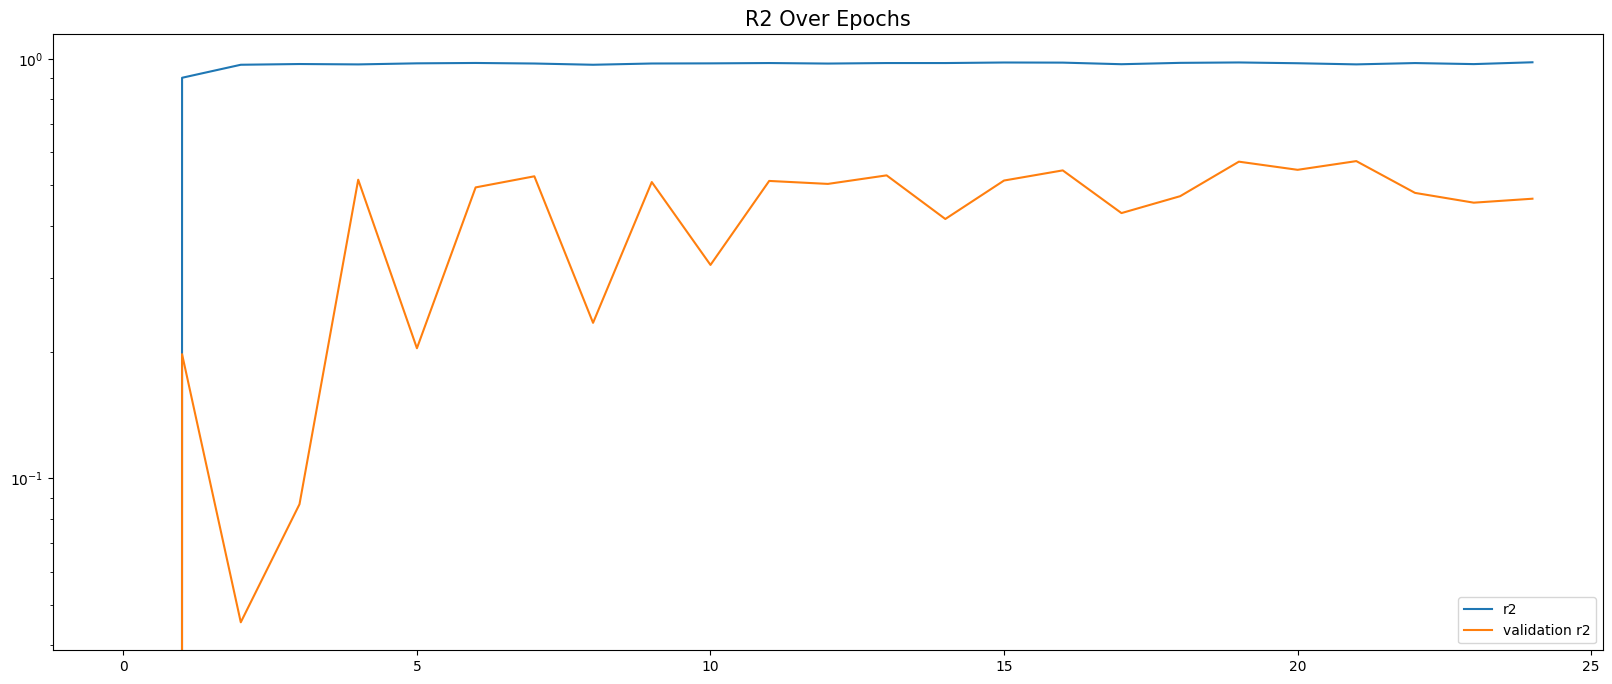

In [83]:
plt.yscale('log')
plt.plot(history.history['r2_metric'])
plt.plot(history.history['val_r2_metric'])
plt.title('R2 Over Epochs',size=15)
plt.legend(['r2','validation r2']);

In [84]:
model.evaluate(X,Y, batch_size=batch_size, verbose=0)

[154984.359375, 0.5063642859458923]

In [90]:
#R2 for all Data
Y_pred =model.predict(X)
score2=r2_score(Y,  Y_pred)
score_percent2 = score2 * 100
print(f'R2 score using RNN : {score_percent2:.2f}%')

31/31 [==============================] - 1s 16ms/step
R2 score using RNN : 98.88%


In [91]:
#R2 training data 
Y_train_pred =model.predict(X_train)
score3=r2_score(Y_train,  Y_train_pred)
score_percent3 = score3 * 100
print(f' R2 score for data train using RNN : {score_percent2:.2f}%')

19/19 [==============================] - 0s 10ms/step
 R2 score for data train using RNN : 98.88%


In [92]:
#R2 training data 
Y_test_pred =model.predict(X_test)
score4=r2_score(Y_test,  Y_test_pred)
score_percent4 = score3 * 100
print(f' R2 score for data test using RNN : {score_percent2:.2f}%')

12/12 [==============================] - 0s 19ms/step
 R2 score for data test using RNN : 98.88%


Text(0.5, 1.0, 'All data,train and test combined using stride 10')

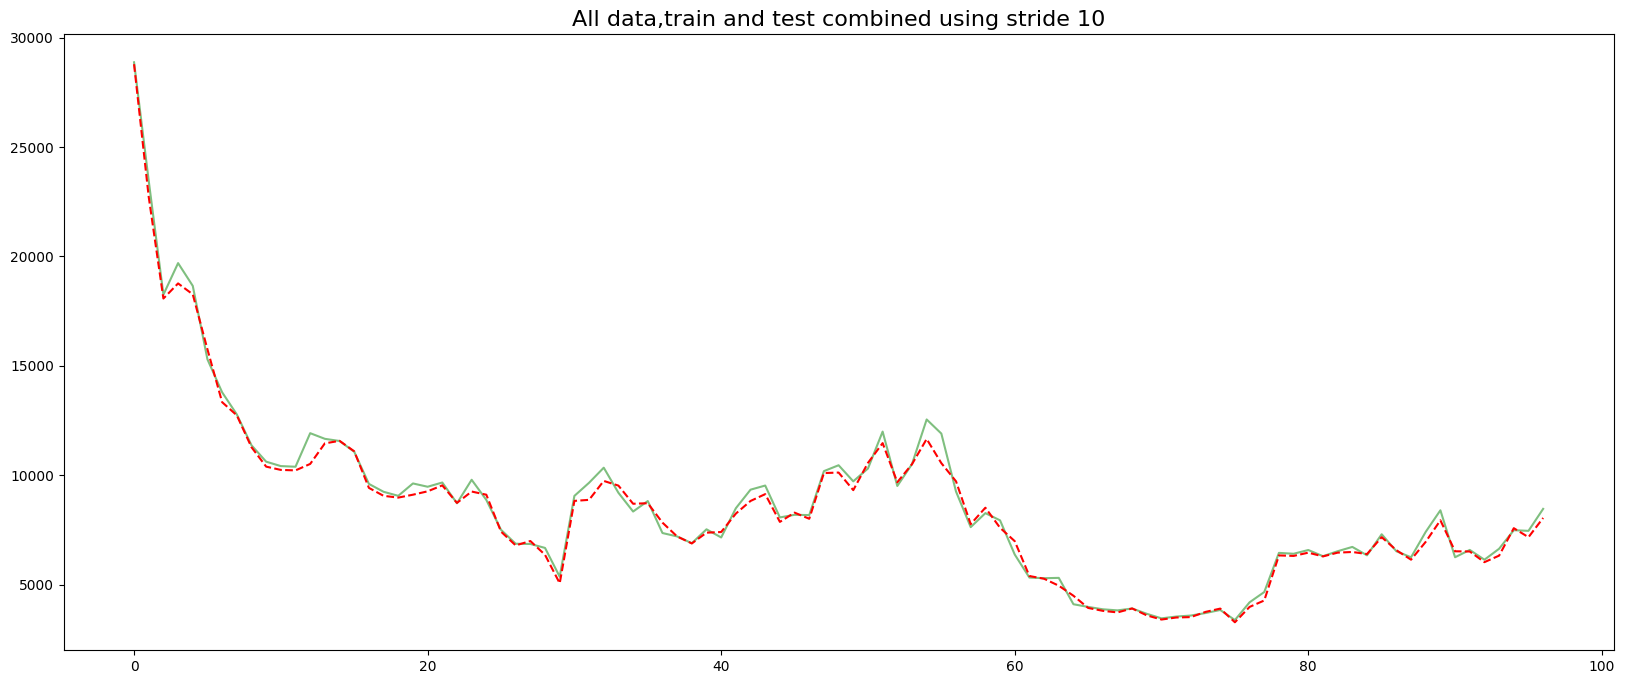

In [88]:
# Let's plot predicted and true over each other 
stride = 10
plt.plot(open_USD[n_steps_in::stride], alpha=0.5, color='g')
plt.plot(Y_pred[::stride],color='r',ls='dashed')
plt.title('All data,train and test combined using stride 10',size=16)

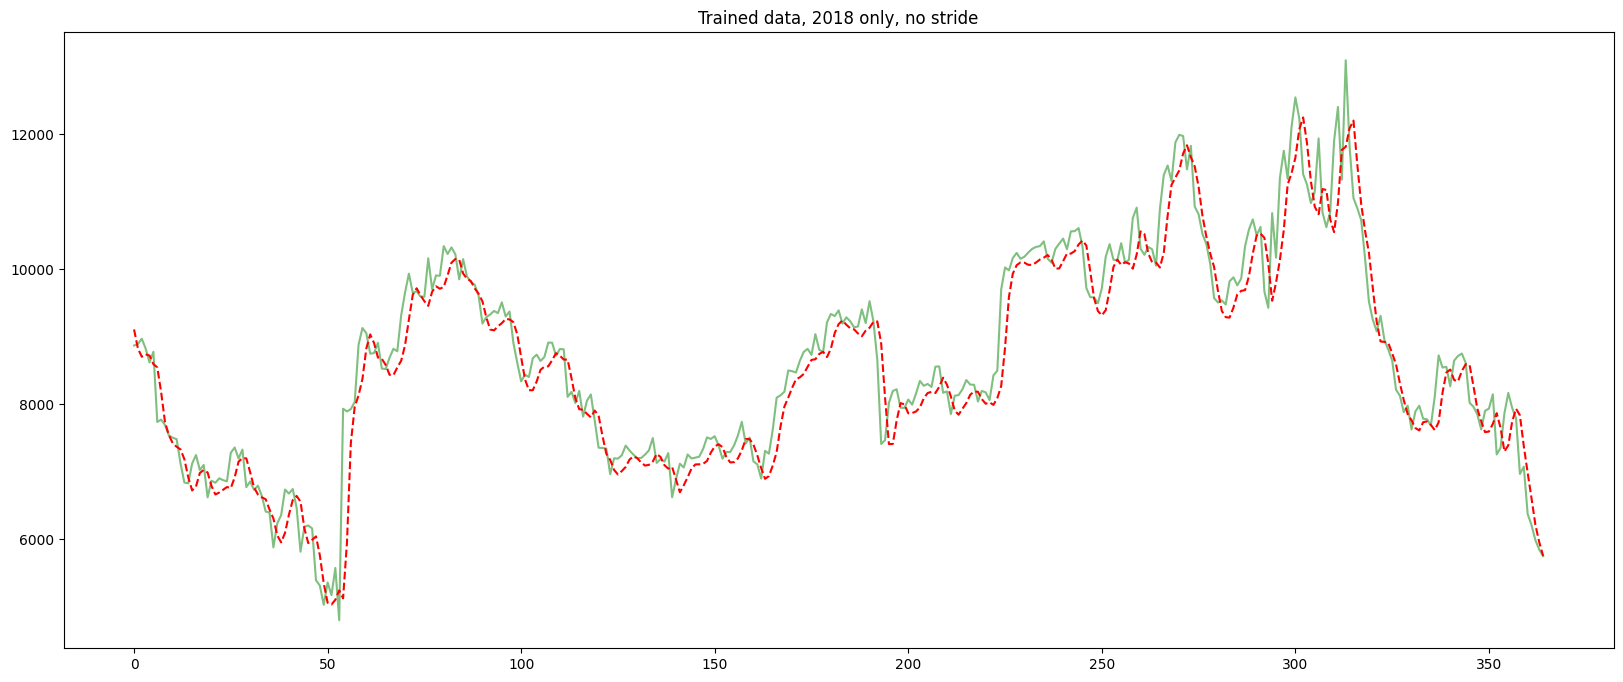

In [94]:
stride = 1


plt.plot(open_USD[-2 * 365:-365:stride], alpha=0.5, color='g')
plt.plot(Y_train_pred[-365::stride], color='r', ls='dashed')

plt.title('Trained data, 2018 only, no stride');

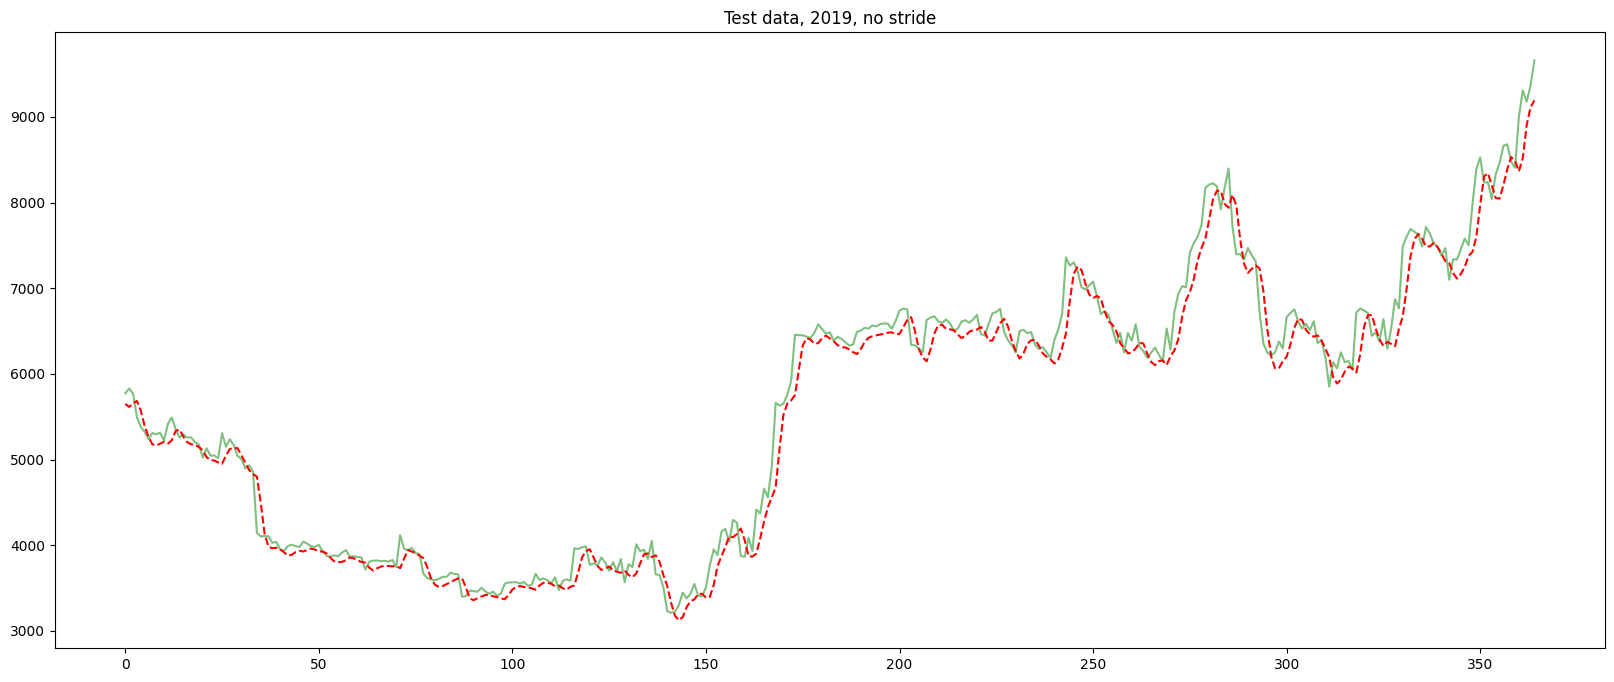

In [95]:
stride = 1


plt.plot(open_USD[-365::stride], alpha=0.5, color='g')
plt.plot(Y_test_pred[::stride], color='r', ls='dashed')

plt.title('Test data, 2019, no stride');


In [96]:
print(f'R2 score using R2 Metric : {score_percent1:.2f}%')
print(f'R2 score using RNN model : {score_percent3:.2f}%')


R2 score using R2 Metric : 99.16%
R2 score using RNN model : 98.29%


**Conclusion**

From the prediction results using R2 Metric and RNN it produces the same high r2 score with a percentage of around 98-99%, this shows that the model is optimal in predicting bitcoin datasets correctly.

